In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [30]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"
df = pd.read_csv(path)

In [31]:
print(df.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [32]:
print("Décompte des valeurs dans la colonne 'custcat':")
print(df['custcat'].value_counts())

Décompte des valeurs dans la colonne 'custcat':
custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64


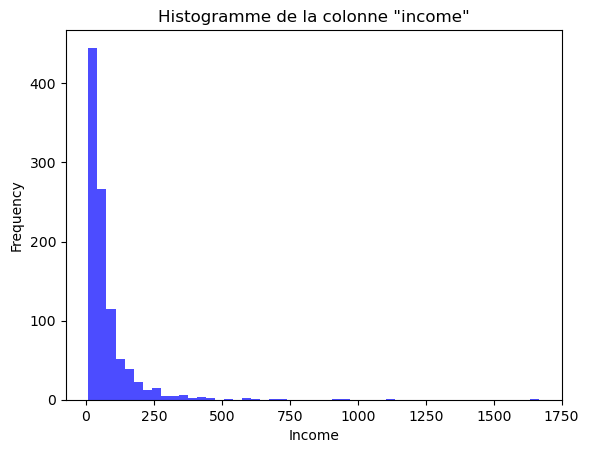

In [33]:
# Visualisation de l'histogramme de la colonne 'income' avec 50 bacs
plt.hist(df['income'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogramme de la colonne "income"')
plt.show()

In [34]:
# Sélectionnement les colonnes spécifiées et stocker les valeurs dans X
selected_columns = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']
X = df[selected_columns].values
# Sélectionnement les valeurs de la colonne 'custcat' et les stocker dans y
y = df['custcat'].values

In [35]:
# Normalisation des données dans la matrice X
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# Convertir X_train en DataFrame Pandas avec les noms de colonnes
X_train_df = pd.DataFrame(X_train, columns=selected_columns)


In [36]:
# Calculer l'IQR pour les colonnes sélectionnées dans les données d'entraînement
Q1 = X_train_df[selected_columns].quantile(0.25)
Q3 = X_train_df[selected_columns].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5

In [37]:
# Créer un masque pour les valeurs aberrantes dans les colonnes sélectionnées
outlier_mask = (
    (X_train_df[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train_df[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

In [38]:
# Supprimer les lignes avec des valeurs aberrantes de X_train et y_train
X_train_clean = X_train_df[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

In [39]:
# Entraînement du modèle des k plus proches voisins avec les données nettoyées
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train_clean, y_train_clean)
print(neigh)

KNeighborsClassifier(n_neighbors=4)


In [40]:
yhat = neigh.predict(X_test)
print("Les cinq premières prédictions:")
print(yhat[0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train_clean, neigh.predict(X_train_clean)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Les cinq premières prédictions:
[1 1 3 2 4]
Train set Accuracy:  0.5453172205438066
Test set Accuracy:  0.3


In [45]:
def try_different_k_values(X_train, y_train, X_test, y_test, max_k=10):
    accuracy_values = []
    for k in range(1, max_k + 1):
        # Entraînement du modèle des k plus proches voisins
        neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        # Prédictions sur l'ensemble de test
        yhat = neigh.predict(X_test)
        # Calcul de l'accuracy
        accuracy = metrics.accuracy_score(y_test, yhat)
        accuracy_values.append(accuracy)
        # Affichage de l'accuracy pour chaque k
        print(f"Pour k = {k}, Test set Accuracy: {accuracy:.4f}")

    # Tracage de l'accuracy en fonction de k
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), accuracy_values, marker='o', linestyle='--', color='b')
    plt.title('Accuracy en fonction de la valeur de k')
    plt.xlabel('Valeur de k')
    plt.ylabel('Accuracy')
    plt.show()

    return accuracy_values

Pour k = 1, Test set Accuracy: 0.2950
Pour k = 2, Test set Accuracy: 0.2850
Pour k = 3, Test set Accuracy: 0.3050
Pour k = 4, Test set Accuracy: 0.3000
Pour k = 5, Test set Accuracy: 0.3200
Pour k = 6, Test set Accuracy: 0.3200
Pour k = 7, Test set Accuracy: 0.3350
Pour k = 8, Test set Accuracy: 0.3100
Pour k = 9, Test set Accuracy: 0.3500
Pour k = 10, Test set Accuracy: 0.3250


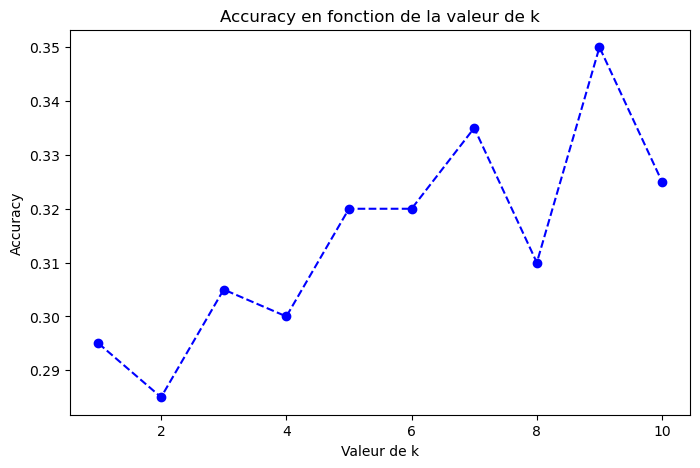

In [46]:
accuracy_values = try_different_k_values(X_train_clean, y_train_clean, X_test, y_test, max_k=10)

In [47]:
best_accuracy = max(accuracy_values)
best_k = accuracy_values.index(best_accuracy) + 1  
print("The best accuracy was with", best_accuracy, "with k =", best_k)

The best accuracy was with 0.35 with k = 9
